In [1]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

Single Tree:0.9074074074074074 Random Forest:1.0


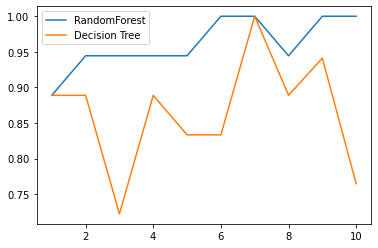

In [2]:
# 导入需要的数据
wine = load_wine()
wine.data
wine.target.shape
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)
score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)
print("Single Tree:{}".format(score_c)
     ,"Random Forest:{}".format(score_r)
     )
# 画出随机森林和决策树在一组交叉验证下的效果对比

#目的是带大家复习一下交叉验证
#交叉验证：是数据集划分为n分，依次取每一份做测试集，每n-1份做训练集，多次训练模型以观测模型稳定性的方法

rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)
clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)
plt.plot(range(1,11),rfc_s,label = "RandomForest")
plt.plot(range(1,11),clf_s,label = "Decision Tree")
plt.legend()
plt.show()

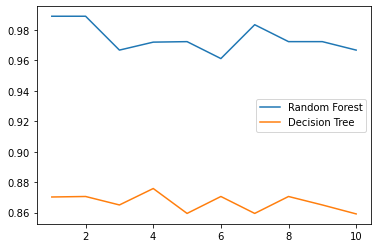

0.9888888888888889 45


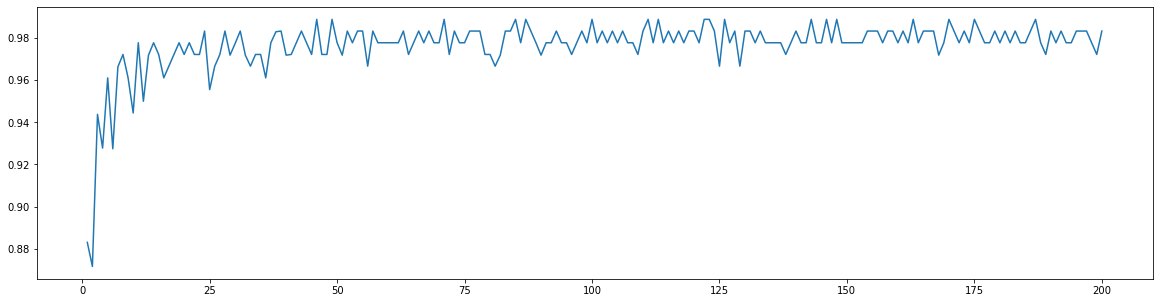

In [14]:
# 5. 画出随机森林和决策树在十组交叉验证下的效果对比
rfc_l = []
clf_l = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_l.append(clf_s)
    
plt.plot(range(1,11),rfc_l,label = "Random Forest")
plt.plot(range(1,11),clf_l,label = "Decision Tree")
plt.legend()
plt.show()

#是否有注意到，单个决策树的波动轨迹和随机森林一致？
#再次验证了我们之前提到的，单个决策树的准确率越高，随机森林的准确率也会越高
#####【TIME WARNING: 2mins 30 seconds】#####
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show()


In [3]:
# 用随机森林回归填补缺失值
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
# . 以波士顿数据集为例，导入完整的数据集并探索
from sklearn.impute import SimpleImputer
dataset = load_boston()
dataset.data.shape
#总共506*13=6578个数据
X_full, y_full = dataset.data, dataset.target

# 构造缺失数据  
n_samples = X_full.shape[0]
n_features = X_full.shape[1]
#首先确定我们希望放入的缺失数据的比例，在这里我们假设是50%，那总共就要有3289个数据缺失
rng = np.random.RandomState(0)
missing_rate = 0.5
n_missing_samples = int(np.floor(n_samples * n_features * missing_rate))
#np.floor向下取整，返回.0格式的浮点数
#所有数据要随机遍布在数据集的各行各列当中，而一个缺失的数据会需要一个行索引和一个列索引
#如果能够创造一个数组，包含3289个分布在0~506中间的行索引，和3289个分布在0~13之间的列索引，那我们就可以利用索引来为数据中的任意3289个位置赋空值
#然后我们用0，均值和随机森林来填写这些缺失值，然后查看回归的结果如何
missing_features = rng.randint(0,n_features,n_missing_samples)
missing_samples = rng.randint(0,n_samples,n_missing_samples)
#missing_samples = rng.choice(dataset.data.shape[0],n_missing_samples,replace=False)
#我们现在采样了3289个数据，远远超过我们的样本量506，所以我们使用随机抽取的函数randint。但如果我们需要的数据量小于我们的样本量506，那我们可以采用np.random.choice来抽样，choice会随机抽取不重复的随机数，因此可以帮助我们让数据更加分散，确保数据不会集中在一些行中
X_missing = X_full.copy()
y_missing = y_full.copy()
X_missing[missing_samples,missing_features] = np.nan
X_missing = pd.DataFrame(X_missing)

#转换成DataFrame是为了后续方便各种操作，numpy对矩阵的运算速度快到拯救人生，但是在索引等功能上却不如pandas来得好用
#使用均值进行填补
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_missing_mean = imp_mean.fit_transform(X_missing)
#使用0进行填补
imp_0 = SimpleImputer(missing_values=np.nan, strategy="constant",fill_value=0)
X_missing_0 = imp_0.fit_transform(X_missing)

In [5]:
# 5. 使用随机森林填补缺失值
"""
使用随机森林回归填补缺失值
任何回归都是从特征矩阵中学习，然后求解连续型标签y的过程，之所以能够实现这个过程，是因为回归算法认为，特征
矩阵和标签之前存在着某种联系。实际上，标签和特征是可以相互转换的，比如说，在一个“用地区，环境，附近学校数
量”预测“房价”的问题中，我们既可以用“地区”，“环境”，“附近学校数量”的数据来预测“房价”，也可以反过来，
用“环境”，“附近学校数量”和“房价”来预测“地区”。而回归填补缺失值，正是利用了这种思想。
对于一个有n个特征的数据来说，其中特征T有缺失值，我们就把特征T当作标签，其他的n-1个特征和原本的标签组成新
的特征矩阵。那对于T来说，它没有缺失的部分，就是我们的Y_test，这部分数据既有标签也有特征，而它缺失的部
分，只有特征没有标签，就是我们需要预测的部分。
特征T不缺失的值对应的其他n-1个特征 + 本来的标签：X_train
特征T不缺失的值：Y_train
特征T缺失的值对应的其他n-1个特征 + 本来的标签：X_test
特征T缺失的值：未知，我们需要预测的Y_test
这种做法，对于某一个特征大量缺失，其他特征却很完整的情况，非常适用。
那如果数据中除了特征T之外，其他特征也有缺失值怎么办？
答案是遍历所有的特征，从缺失最少的开始进行填补（因为填补缺失最少的特征所需要的准确信息最少）。
填补一个特征时，先将其他特征的缺失值用0代替，每完成一次回归预测，就将预测值放到原本的特征矩阵中，再继续填
补下一个特征。每一次填补完毕，有缺失值的特征会减少一个，所以每次循环后，需要用0来填补的特征就越来越少。当
进行到最后一个特征时（这个特征应该是所有特征中缺失值最多的），已经没有任何的其他特征需要用0来进行填补了，
而我们已经使用回归为其他特征填补了大量有效信息，可以用来填补缺失最多的特征。
遍历所有的特征后，数据就完整，不再有缺失值了。
"""

X_missing_reg = X_missing.copy()
sortindex = np.argsort(X_missing_reg.isnull().sum(axis=0)).values

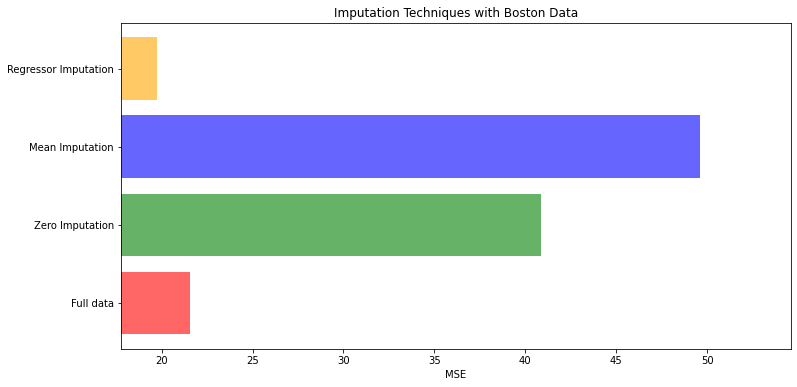

In [6]:
for i in sortindex: #  按照缺失值的列 从小到大
    #构建我们的新特征矩阵和新标签
    df = X_missing_reg
    fillc = df.iloc[:,i]
    df = pd.concat([df.iloc[:,df.columns != i],pd.DataFrame(y_full)],axis=1) # 把缺失一列当作label
    #在新特征矩阵中，对含有缺失值的列，进行0的填补
    df_0 =SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0).fit_transform(df)
    #找出我们的训练集和测试集
    Ytrain = fillc[fillc.notnull()]
    Ytest = fillc[fillc.isnull()]
    Xtrain = df_0[Ytrain.index,:]
    Xtest = df_0[Ytest.index,:]
    #用随机森林回归来填补缺失值
    rfc = RandomForestRegressor(n_estimators=100)
    rfc = rfc.fit(Xtrain, Ytrain)
    Ypredict = rfc.predict(Xtest)
    
    #将填补好的特征返回到我们的原始的特征矩阵中
    X_missing_reg.loc[X_missing_reg.iloc[:,i].isnull(),i] = Ypredict
    
 #6. 对填补好的数据进行建模  
    
X = [X_full,X_missing_mean,X_missing_0,X_missing_reg]
mse = []
std = []
for x in X:
    estimator = RandomForestRegressor(random_state=0, n_estimators=100)
    scores = cross_val_score(estimator,x,y_full,scoring='neg_mean_squared_error', cv=5).mean()
    mse.append(scores * -1)
# 画图 在不同的填充方法上 
x_labels = ['Full data', 'Zero Imputation', 'Mean Imputation',  'Regressor Imputation']
colors = ['r', 'g', 'b', 'orange']
plt.figure(figsize=(12, 6))
ax = plt.subplot(111)
for i in np.arange(len(mse)):
    ax.barh(i, mse[i],color=colors[i], alpha=0.6, align='center')
ax.set_title('Imputation Techniques with Boston Data')
ax.set_xlim(left=np.min(mse) * 0.9,
             right=np.max(mse) * 1.1)
ax.set_yticks(np.arange(len(mse)))
ax.set_xlabel('MSE')
ax.set_yticklabels(x_labels)
plt.show()
    
    

In [8]:
# 乳腺癌数据，来看看我们的调参代码
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data = load_breast_cancer()
data.data.shape
data.target
#可以看到，乳腺癌数据集有569条记录，30个特征，单看维度虽然不算太高，但是样本量非常少。过拟合的情况可能存在。
rfc = RandomForestClassifier(n_estimators=100,random_state=90)
score_pre = cross_val_score(rfc,data.data,data.target,cv=10).mean()
score_pre
#这里可以看到，随机森林在乳腺癌数据上的表现本就还不错，在现实数据集上，基本上不可能什么都不调就看到95%以


0.9648809523809524

0.9648812296227295 151


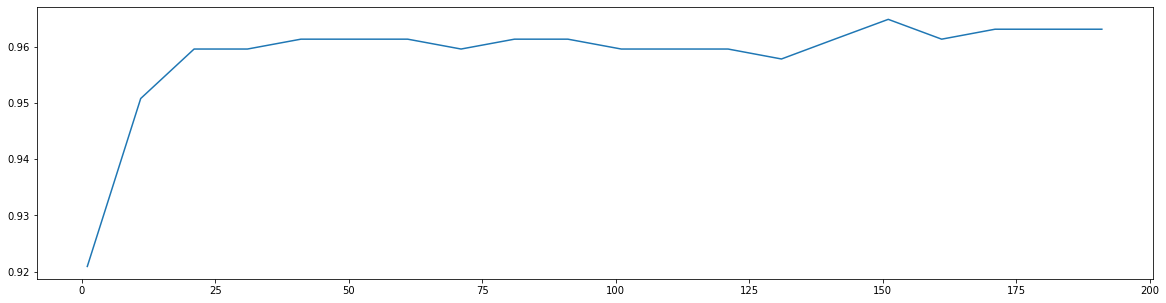

0.9613721804511279 41


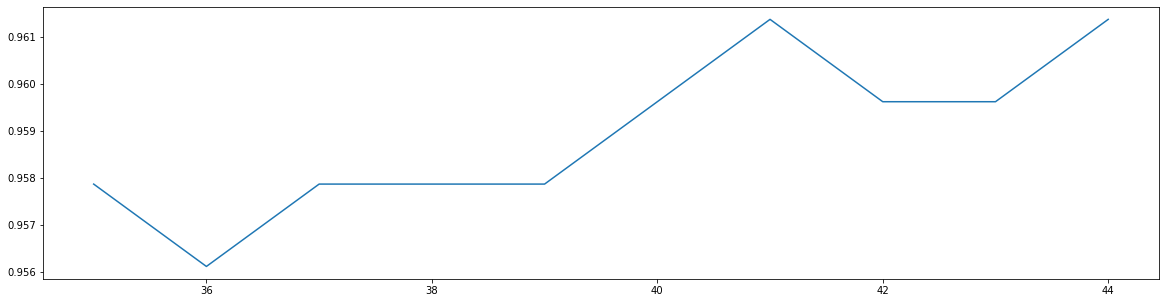

In [10]:
# 随机森林调整的第一步：无论如何先来调n_estimators
"""
在这里我们选择学习曲线，可以使用网格搜索吗？可以，但是只有学习曲线，才能看见趋势
我个人的倾向是，要看见n_estimators在什么取值开始变得平稳，是否一直推动模型整体准确率的上升等信息
第一次的学习曲线，可以先用来帮助我们划定范围，我们取每十个数作为一个阶段，来观察n_estimators的变化如何
引起模型整体准确率的变化
"""
#####【TIME WARNING: 30 seconds】#####
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1, random_state=90)
    score = cross_val_score(rfc,data.data,data.target,cv=5).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1) # 准确率最高 ，下标索引最大 emastimators 棵树
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()
#list.index([object])
#返回这个object在列表list中的索引
#  在确定好的范围内，进一步细化学习曲线

scorel = []
for i in range(35,45):
    rfc = RandomForestClassifier(n_estimators=i,
                                 n_jobs=-1,
                                 random_state=90)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)
print(max(scorel),([*range(35,45)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(35,45),scorel)
plt.show()

In [11]:
# 为网格搜索做准备，书写网格搜索的参数

"""
有一些参数是没有参照的，很难说清一个范围，这种情况下我们使用学习曲线，看趋势
从曲线跑出的结果中选取一个更小的区间，再跑曲线

7. 开始按照参数对模型整体准确率的影响程度进行调参，首先调整max_depth
param_grid = {'n_estimators':np.arange(0, 200, 10)}
param_grid = {'max_depth':np.arange(1, 20, 1)}    
param_grid = {'max_leaf_nodes':np.arange(25,50,1)}
 对于大型数据集，可以尝试从1000来构建，先输入1000，每100个叶子一个区间，再逐渐缩小范围
有一些参数是可以找到一个范围的，或者说我们知道他们的取值和随着他们的取值，模型的整体准确率会如何变化，这
样的参数我们就可以直接跑网格搜索
param_grid = {'criterion':['gini', 'entropy']}
param_grid = {'min_samples_split':np.arange(2, 2+20, 1)}
param_grid = {'min_samples_leaf':np.arange(1, 1+10, 1)}
param_grid = {'max_features':np.arange(5,30,1)} 
"""
#调整max_depth
param_grid = {'max_depth':np.arange(1, 20, 1)}
# 一般根据数据的大小来进行一个试探，乳腺癌数据很小，所以可以采用1~10，或者1~20这样的试探
# 但对于像digit recognition那样的大型数据来说，我们应该尝试30~50层深度（或许还不足够
#   更应该画出学习曲线，来观察深度对模型的影响
rfc = RandomForestClassifier(n_estimators=39,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
print(GS.best_params_)
print(GS.best_score_)

# 8. 调整max_features



{'max_depth': 6}
0.9631265664160402


In [13]:
#调整max_features
param_grid = {'max_features':np.arange(5,30,1)} 
"""
max_features是唯一一个即能够将模型往左（低方差高偏差）推，也能够将模型往右（高方差低偏差）推的参数。我
们需要根据调参前，模型所在的位置（在泛化误差最低点的左边还是右边）来决定我们要将max_features往哪边调。
现在模型位于图像左侧，我们需要的是更高的复杂度，因此我们应该把max_features往更大的方向调整，可用的特征
越多，模型才会越复杂。max_features的默认最小值是sqrt(n_features)，因此我们使用这个值作为调参范围的
最小值。
"""
rfc = RandomForestClassifier(n_estimators=39  ,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
print(GS.best_params_)
print(GS.best_score_)


{'max_features': 6}
0.968421052631579


In [14]:
# 9. 调整min_samples_leaf
# 可以看见，网格搜索返回了min_samples_leaf的最小值，并且模型整体的准确率还降低了，这和max_depth的情
# 况一致，参数把模型向左推，但是模型的泛化误差上升了。在这种情况下，我们显然是不要把这个参数设置起来
# 的，就让它默认就好了。
# 10. 不懈努力，继续尝试min_samples_split
#调整min_samples_leaf
param_grid={'min_samples_leaf':np.arange(1, 1+10, 1)}
#对于min_samples_split和min_samples_leaf,一般是从他们的最小值开始向上增加10或20
#面对高维度高样本量数据，如果不放心，也可以直接+50，对于大型数据，可能需要200~300的范围
#如果调整的时候发现准确率无论如何都上不来，那可以放心大胆调一个很大的数据，大力限制模型的复杂度
rfc = RandomForestClassifier(n_estimators=39 ,random_state=90 )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
print(GS.best_params_)
print(GS.best_score_)

#调整min_samples_split
param_grid={'min_samples_split':np.arange(2, 2+20, 1)}
rfc = RandomForestClassifier(n_estimators=39 ,random_state=90 )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
print(GS.best_params_)
print(GS.best_score_)

{'min_samples_leaf': 4}
0.9613721804511279
{'min_samples_split': 3}
0.9613721804511279


In [15]:
# 最后尝试一下criterion
# 12. 调整完毕，总结出模型的最佳参数
# 在整个调参过程之中，我们首先调整了n_estimators（无论如何都请先走这一步），然后调整max_depth，通过
# max_depth产生的结果，来判断模型位于复杂度-泛化误差图像的哪一边，从而选择我们应该调整的参数和调参的
# 方向。如果感到困惑，也可以画很多学习曲线来观察参数会如何影响我们的准确率，选取学习曲线中单调的部分来
# 放大研究（如同我们对n_estimators做的）。学习曲线的拐点也许就是我们一直在追求的，最佳复杂度对应的泛化
# 误差最低点（也是方差和偏差的平衡点）。
# 网格搜索也可以一起调整多个参数，大家只要有时间，可以自己跑一下，看看网格搜索会给我们怎样的结果，有时
# 候，它的结果比我们的好，有时候，我们手动调整的结果会比较好。当然了，我们的乳腺癌数据集非常完美，所以
# 只需要调n_estimators一个参数就达到了随机森林在这个数据集上表现得极限。在我们上周使用的泰坦尼克号案例
# 的数据中，我们使用同样的方法调出了如下的参数组合。
# 基于泰坦尼克号数据调整出来的参数，数据的处理过程请参考上一期的完整视频。这个组合的准确率达到了
# 83.915%，比单棵决策树提升了大约7%，比调参前的随机森林提升了2.02%，这对于调参来说其实是一个非常巨大
# 的进步。不过，泰坦尼克号数据的运行缓慢，大家量力量时间而行，可以试试看用复杂度-泛化误差方法（方差-偏
# 差方法）来解读一下这个调参结果和过程。
#调整Criterion
param_grid = {'criterion':['gini', 'entropy']}
rfc = RandomForestClassifier(n_estimators=39
                             ,random_state=90
                           )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
print(GS.best_params_)
print(GS.best_score_)
rfc = RandomForestClassifier(n_estimators=39,random_state=90)
score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
print(score)
print(score - score_pre)
rfc = RandomForestClassifier(n_estimators=68 ,random_state=90,criterion="gini" ,min_samples_split=8
                             ,min_samples_leaf=1
                             ,max_depth=12
                             ,max_features=2
                             ,max_leaf_nodes=36)



{'criterion': 'entropy'}
0.9649122807017543
0.9578634085213033
-0.007017543859649145
